<a href="https://colab.research.google.com/github/PaoloSani/ACTaM-CMRM-Project/blob/master/src/0_DatasetAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ANALYSIS OF THE DATASET**
### Count and plot how many examples for each class are present in each fold. Analyze the length and format of each audio segment. Check if the audio segments are mono or stereo.

# Import libraries

In [1]:
import pandas as pd
import numpy as np

# Mount the drive and enter the dataset directory

In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/MyDrive/CMLS_HW1_UrbanClassification/dataset"
%ls

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1i9lEcEb5PQxKCFXJaoO3WLS2p3xBnkij/CMLS_HW1_UrbanClassification/dataset
extracted_features.json  fold3/  fold7/                prova_feature_2.json
fold1/                   fold4/  fold8/                UrbanSound8K.csv
fold10/                  fold5/  fold9/
fold2/                   fold6/  prova_feature_1.json


# Analyze the dataset distribution from the audio files (optional)

In [6]:
# Assume that the dataset is in the current directory
dataset_path = Path(".")

# For each directory, which corresponds to a fold ...
for current_fold_dir in dataset_path.iterdir():
  # Check if the directory is really a directory
  if current_fold_dir.is_dir():
    # Save the current fold number
    current_fold_number = re.findall('[0-9-]+', str(current_fold_dir)) # Extract the fold number with regex
    print("Scanning fold %i of 10", current_fold_number)#, end='\x1b[1K\r') # Status printing with line clearing
    
    # For each audio file in current_fold_dir
    for current_audio_dir in (dataset_path / current_fold_dir).iterdir():
      # Check if it's really a file and not a folder
      if not current_audio_dir.is_dir():
        ## TODO: ##
        # Extract the class of the audio file with regex
        # Increment the counter for the current class in the current fold
        # Check if the file is mono or stereo
        # Check the duration of the audio file

SyntaxError: ignored

# Analyze the dataset distribution from the CSV metadata (recommended)

## Load the metadata

In [7]:
class_names = ["air_conditioner", "car_horn", "children_playing", "dog_bark",
               "drilling", "engine_idling", "gun_shot", "jackhammer",
               "siren", "street_music"]

In [8]:
dataset_metadata = pd.read_csv('UrbanSound8K.csv')
print(dataset_metadata)

         slice_file_name    fsID       start  ...  fold  classID         className
0       100032-3-0-0.wav  100032    0.000000  ...     5        3          dog_bark
1     100263-2-0-117.wav  100263   58.500000  ...     5        2  children_playing
2     100263-2-0-121.wav  100263   60.500000  ...     5        2  children_playing
3     100263-2-0-126.wav  100263   63.000000  ...     5        2  children_playing
4     100263-2-0-137.wav  100263   68.500000  ...     5        2  children_playing
...                  ...     ...         ...  ...   ...      ...               ...
8727     99812-1-2-0.wav   99812  159.522205  ...     7        1          car_horn
8728     99812-1-3-0.wav   99812  181.142431  ...     7        1          car_horn
8729     99812-1-4-0.wav   99812  242.691902  ...     7        1          car_horn
8730     99812-1-5-0.wav   99812  253.209850  ...     7        1          car_horn
8731     99812-1-6-0.wav   99812  332.289233  ...     7        1          car_horn

[87

In [9]:
dataset_metadata = pd.read_csv('UrbanSound8K.csv',
                               usecols = ['fold', 'classID', 'className'],
                               dtype = {'fold':np.uint32 , 'classID':np.uint32})
print(dataset_metadata)

      fold  classID         className
0        5        3          dog_bark
1        5        2  children_playing
2        5        2  children_playing
3        5        2  children_playing
4        5        2  children_playing
...    ...      ...               ...
8727     7        1          car_horn
8728     7        1          car_horn
8729     7        1          car_horn
8730     7        1          car_horn
8731     7        1          car_horn

[8732 rows x 3 columns]


## Plot the distributions

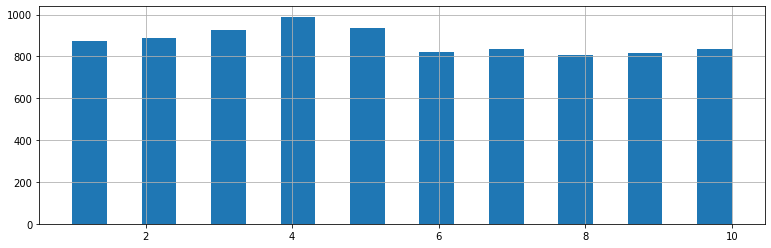

In [21]:
# How many audio samples for each fold

fold_ax = dataset_metadata.fold.hist(bins=19, figsize=(13,4))

In [17]:
folds = set(dataset_metadata['fold'])
print(folds)
cnt = [[fold,list(dataset_metadata['fold']).count(fold)] for fold in folds]
dict_cnt = dict(cnt)

dict_cnt

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}


{1: 873,
 2: 888,
 3: 925,
 4: 990,
 5: 936,
 6: 823,
 7: 838,
 8: 806,
 9: 816,
 10: 837}

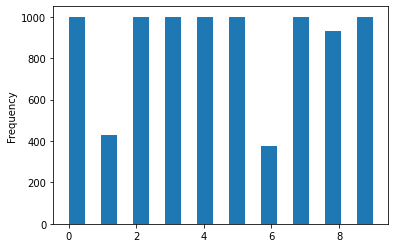

In [18]:
# How many audio samples for each class

classID_ax = dataset_metadata.classID.plot.hist(bins=19)

In [20]:
labels = set(dataset_metadata['className'])
cnt = [[label,list(dataset_metadata['className']).count(label)] for label in labels]
dict_cnt = dict(cnt)
dict_cnt

{'air_conditioner': 1000,
 'car_horn': 429,
 'children_playing': 1000,
 'dog_bark': 1000,
 'drilling': 1000,
 'engine_idling': 1000,
 'gun_shot': 374,
 'jackhammer': 1000,
 'siren': 929,
 'street_music': 1000}